In [74]:
import pandas as pd
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

In [75]:
# load data-sets
data_original = 'True_Malignant.csv'
data_zero_shot = 'LLM-generated data(zero shot).csv'
data_context = 'context-synthetic version.csv'

df_original = pd.read_csv(data_original)
df_zero = pd.read_csv(data_zero_shot)
df_context = pd.read_csv(data_context)

In [76]:
# prepare for PCA reduction
# first, remove "target" column to focus on features
features_original = df_original.drop(columns=['target'])
features_zero = df_zero
features_context = df_context

In [77]:
# Standardize column names to match for consistency
features_original.columns = features_original.columns.str.lower()
features_zero.columns = features_zero.columns.str.lower()
features_context.columns = features_context.columns.str.lower()

In [78]:
# Ensure columns match between the datasets
features_zero = features_zero[features_original.columns]
features_context = features_context[features_original.columns]

In [79]:
# Perform PCA to reduce dimensionality to 2D
pca = PCA(n_components=2)
pca_original = pca.fit_transform(features_original)

In [80]:
# Plot the PCA results
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

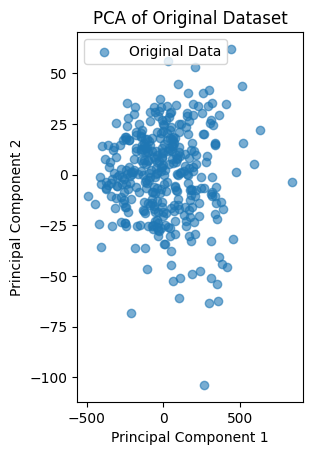

In [81]:
# Plot original dataset distribution
plt.subplot(1, 2, 1)
plt.scatter(pca_original[:, 0], pca_original[:, 1], alpha=0.6, label='Original Data')
plt.title('PCA of Original Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

In [83]:
# Output variance ratios for explanation
variance_original_v = pca.explained_variance_ratio_
print("Variance Ratios (Original Dataset):", variance_original_v)

Variance Ratios (Original Dataset): [0.98644876 0.0109128 ]


In [84]:
pca_zero = pca.fit_transform(features_zero)

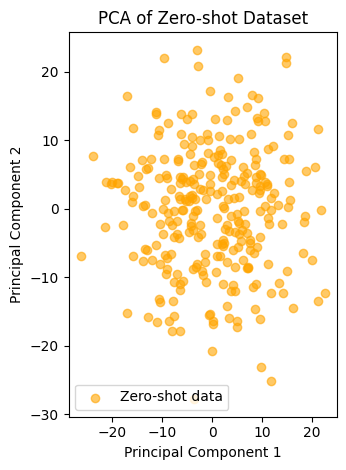

In [85]:
# Plot zero-shot dataset distribution
plt.subplot(1, 2, 2)
plt.scatter(pca_zero[:, 0], pca_zero[:, 1], alpha=0.6, label='Zero-shot data', color='orange')
plt.title('PCA of Zero-shot Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.tight_layout()
plt.show()

In [86]:
# use PCA
variance_zero_shot_v = pca.explained_variance_ratio_
print("Variance Ratios (Zero-shot Dataset):", variance_zero_shot_v)

Variance Ratios (Zero-shot Dataset): [0.05877688 0.05301587]


In [87]:
# use PCA
pca_context =  pca.fit_transform(features_context)

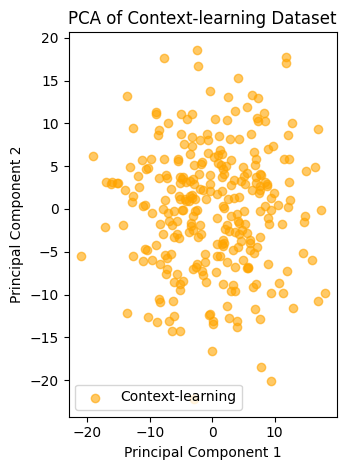

In [88]:
# Plot context learning dataset distribution
plt.subplot(1, 2, 2)
plt.scatter(pca_context[:, 0], pca_context[:, 1], alpha=0.6, label='Context-learning', color='orange')
plt.title('PCA of Context-learning Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()

plt.tight_layout()
plt.show()

In [90]:
# Output variance ratios for explanation
variance_context_learning_v = pca.explained_variance_ratio_
print("Variance Ratios (Context-learning Dataset):", variance_zero_shot_v)

Variance Ratios (Context-learning Dataset): [0.05877688 0.05301587]


In [49]:
# Summary
# 	The synthetic dataset captures a comparable distribution to the original, as seen in the PCA results. However, differences in scatter density and clustering may reflect limitations or peculiarities in the synthetic generation process.	These results suggest the synthetic data closely follows the original dataset’s feature patterns but might benefit from fine-tuning to replicate the real-world variation more precisely.